In [1]:
import numpy as np 
import pandas as pd 

df=pd.read_csv('Bangalore_1990_2022_BangaloreCity.csv')


In [2]:
df.head()

,time,tavg,tmin,tmax,prcp
0,01-01-1990,22.9,19.1,28.4,NaN
1,02-01-1990,21.7,NaN,26.5,0.0
2,03-01-1990,21.0,16.4,26.5,0.0
3,04-01-1990,20.8,NaN,27.4,0.0
4,05-01-1990,20.4,14.2,26.1,0.0


In [3]:
df.isnull().sum()

time       0
tavg      70
tmin    1389
tmax     629
prcp    4620
dtype: int64

In [4]:
for i in df.columns:
    mode=df[i].mode()[0]
    df[i].fillna(mode,inplace=True)
df.isnull().sum()

time    0
tavg    0
tmin    0
tmax    0
prcp    0
dtype: int64

In [5]:
df.head()

,time,tavg,tmin,tmax,prcp
0,01-01-1990,22.9,19.1,28.4,0.0
1,02-01-1990,21.7,20.0,26.5,0.0
2,03-01-1990,21.0,16.4,26.5,0.0
3,04-01-1990,20.8,20.0,27.4,0.0
4,05-01-1990,20.4,14.2,26.1,0.0


In [6]:
df.describe()

,tavg,tmin,tmax,prcp
count,11894.000000,11894.000000,11894.000000,11894.000000
mean,23.836657,19.456936,29.830612,2.699538
std,2.303613,2.233459,2.910908,10.387185
min,17.200000,9.300000,19.800000,0.000000
25%,22.300000,18.600000,28.000000,0.000000
50%,23.500000,20.000000,29.300000,0.000000
75%,25.200000,20.600000,31.700000,0.300000
max,32.400000,27.900000,39.200000,271.300000


In [7]:
df.iloc[:,:3]
df.iloc[:,1:].corr()['tavg']

tavg    1.000000
tmin    0.684336
tmax    0.852823
prcp   -0.054985
Name: tavg, dtype: float64

In [8]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [9]:
X=df.drop(['tmax','time'],axis=1)
y=df['tmax']

In [10]:
x_tr,x_te,y_tr,y_te=train_test_split(X,y,test_size=0.2)

In [12]:
model=LinearRegression()
model.fit(x_tr,y_tr)
prediction=model.predict(x_te)
print(prediction[:10],y_te[:10])
print(mean_squared_error(y_te,prediction))

[34.39155494 33.21050142 29.55598336 25.2886812  29.77586504 26.97089576
 31.9312093  35.43032619 35.06571758 28.88096106] 4488     34.6
7484     33.2
6397     30.2
736      26.2
10440    29.4
11308    26.8
10478    30.3
3046     35.6
3059     36.1
7706     29.7
Name: tmax, dtype: float64
1.8284122630487862


In [13]:
prediction=model.predict(x_te)
print(prediction[:10],y_te[:10])

[34.39155494 33.21050142 29.55598336 25.2886812  29.77586504 26.97089576
 31.9312093  35.43032619 35.06571758 28.88096106] 4488     34.6
7484     33.2
6397     30.2
736      26.2
10440    29.4
11308    26.8
10478    30.3
3046     35.6
3059     36.1
7706     29.7
Name: tmax, dtype: float64


In [14]:
print(mean_squared_error(y_te,prediction))

1.8284122630487862


In [15]:
model=SVR(kernel='rbf')
model.fit(x_tr,y_tr)
prediction=model.predict(x_te)
print(prediction[:10],y_te[:10])
print(mean_squared_error(y_te,prediction))

[34.59228705 33.20607014 29.4373334  27.6863977  29.17028407 26.73105299
 31.92990354 36.06284526 35.45446713 29.31605706] 4488     34.6
7484     33.2
6397     30.2
736      26.2
10440    29.4
11308    26.8
10478    30.3
3046     35.6
3059     36.1
7706     29.7
Name: tmax, dtype: float64
1.7805360156894534


In [16]:
model=KNeighborsRegressor(n_neighbors=10)
model.fit(x_tr,y_tr)
prediction=model.predict(x_te)
print(prediction[:10],y_te[:10])
print(mean_squared_error(y_te,prediction))

[34.74 31.93 29.54 27.12 28.74 26.84 31.46 36.19 35.25 29.48] 4488     34.6
7484     33.2
6397     30.2
736      26.2
10440    29.4
11308    26.8
10478    30.3
3046     35.6
3059     36.1
7706     29.7
Name: tmax, dtype: float64
1.8959611601513242


In [17]:
model=RandomForestRegressor(n_estimators=100)
model.fit(x_tr,y_tr)
prediction=model.predict(x_te)
print(prediction[:10],y_te[:10])
print(mean_squared_error(y_te,prediction))

[34.94253095 31.15510476 29.45951116 26.717      28.87117143 26.84667619
 31.68565952 36.40563333 35.69231468 29.55391667] 4488     34.6
7484     33.2
6397     30.2
736      26.2
10440    29.4
11308    26.8
10478    30.3
3046     35.6
3059     36.1
7706     29.7
Name: tmax, dtype: float64
1.9844209126960235


In [19]:
model=DecisionTreeRegressor(max_depth=5)
model.fit(x_tr,y_tr)
prediction=model.predict(x_te)
print(prediction[:10],y_te[:10])
print(mean_squared_error(y_te,prediction))

[34.49510204 32.71055901 29.6521418  27.82322275 30.12173913 25.63494424
 32.02614841 36.4        35.28296089 27.82322275] 4488     34.6
7484     33.2
6397     30.2
736      26.2
10440    29.4
11308    26.8
10478    30.3
3046     35.6
3059     36.1
7706     29.7
Name: tmax, dtype: float64
1.8524208029111455


In [22]:
!pip install xgboost

     -------------------------------------- 124.9/124.9 MB 5.0 MB/s eta 0:00:00


In [23]:
from xgboost import XGBRegressor

In [24]:
model=XGBRegressor(n_estimators=100)
model.fit(x_tr,y_tr)
prediction=model.predict(x_te)
print(prediction[:10],y_te[:10])
print(mean_squared_error(y_te,prediction))

[34.699852 32.812485 29.419397 26.721441 28.712397 25.789206 31.882195
 36.32776  35.557255 29.407358] 4488     34.6
7484     33.2
6397     30.2
736      26.2
10440    29.4
11308    26.8
10478    30.3
3046     35.6
3059     36.1
7706     29.7
Name: tmax, dtype: float64
1.787209141992635


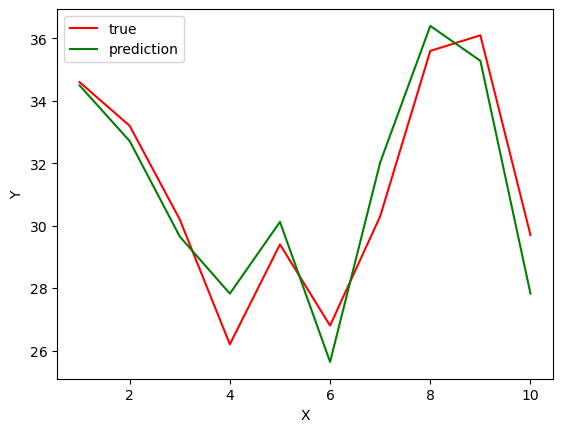

In [21]:
c=prediction[:10]
b=[i for i in range(1,10+1)]
a=y_te[:10]
plt.plot(b,a,'r')
plt.plot(b,c,'g')
plt.legend(['true','prediction'])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

<AxesSubplot:>

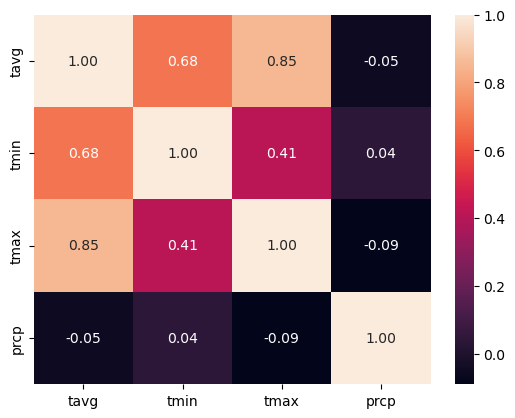

In [25]:
import seaborn as sns
sns.heatmap(df.iloc[:,1:].corr(),fmt='.2f',annot=True)

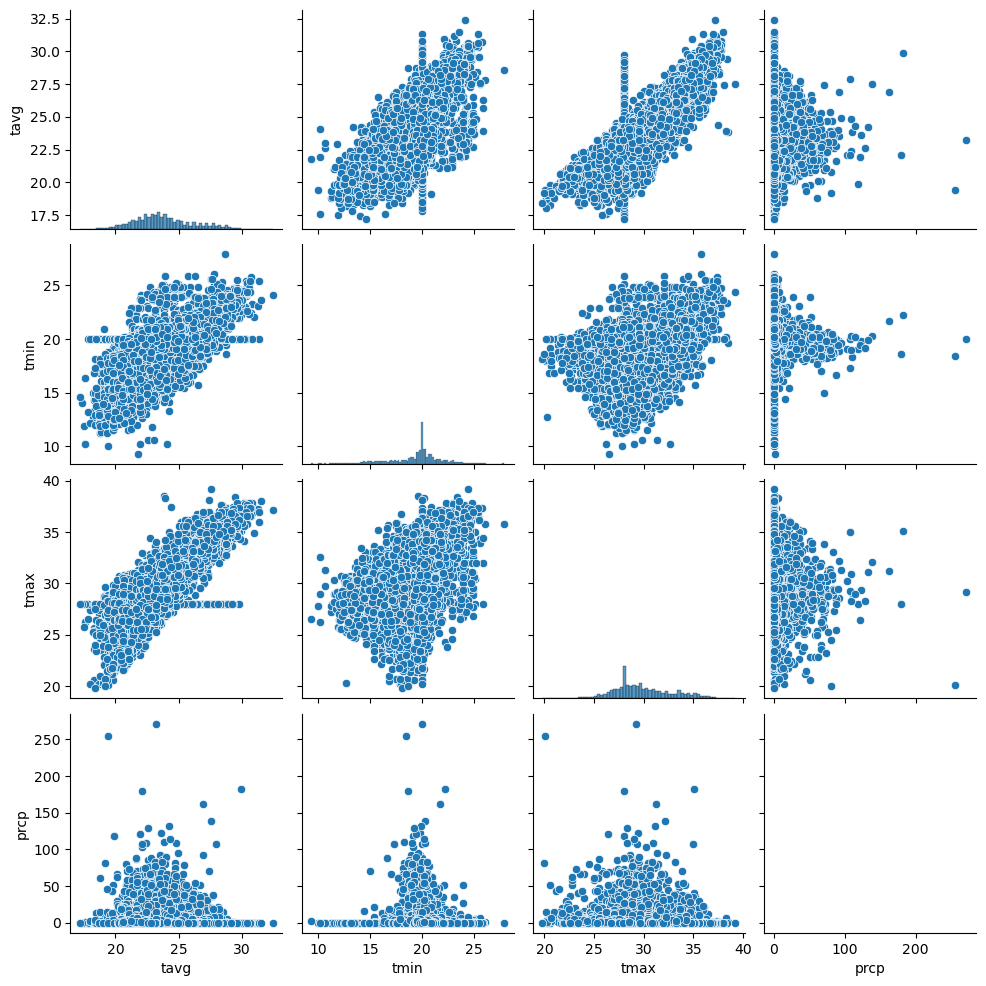

In [26]:
sns.pairplot(df)